版权声明：本材料是南开大学“非线性物理学导论”课程课件，版权归课程老师朱开恩所有。允许拷贝、分发使用，允许修改，但是请保留此版权声明。

版本时间：2019年9月

In [17]:
%matplotlib tk

In [23]:
%matplotlib inline

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 不动点的稳定性分析

## 阻尼震动的例子
$$m\frac{d^2 x}{dt^2}=-k x - \alpha \frac{dx}{dt}$$
$$\frac{d^2 x}{dt^2}=-\mu x - \alpha_m \frac{dx}{dt}$$

In [2]:
def damped_oscillation(mu, beta):
    A = np.array([[0.,1.],[-mu,-beta]])
    eig, vec = np.linalg.eig(A)
    c1 = vec[:,0]
    c2 = vec[:,1]
    lambda1, lambda2 = eig
    print(' A: ', A, '\n lambda1:', lambda1, \
          '\n lambda2:',lambda2,'\n c1:', c1, '\n c2:',c2)

    def oscillation_damped(w,t, mu, beta):
        x,v=w
        return np.array([v, - mu*x - beta * v])

    paras = (mu, beta)


    step = 0.01
    t     = np.arange(0.0,150, step)
    track = odeint(oscillation_damped,(0.01,0.02),t,args=paras)
    track2 = odeint(oscillation_damped,(-0.01,-0.02),t,args=paras)


    plt.plot(track[:,0], track[:,1])
    plt.plot(track2[:,0], track2[:,1])

    plt.title("阻尼震动")
    plt.xlabel("$x$")
    plt.ylabel("$v$")

    plt.show()

 A:  [[  0.   1.]
 [-10.  -2.]] 
 lambda1: (-1+3j) 
 lambda2: (-1-3j) 
 c1: [-0.09534626-0.28603878j  0.95346259+0.j        ] 
 c2: [-0.09534626+0.28603878j  0.95346259-0.j        ]


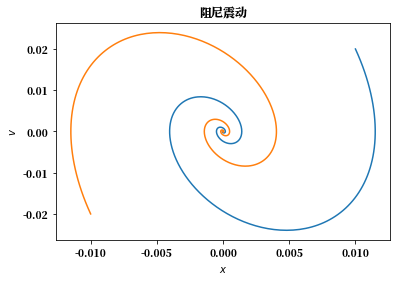

In [6]:
damped_oscillation(10., 2.)

In [4]:
(-0.09534626-0.28603878j)/0.95346259

(-0.10000000104880885-0.30000000314642655j)

 A:  [[ 0.  1.]
 [-1. -3.]] 
 lambda1: -0.38196601125 
 lambda2: -2.61803398875 
 c1: [ 0.93417236 -0.35682209] 
 c2: [-0.35682209  0.93417236]


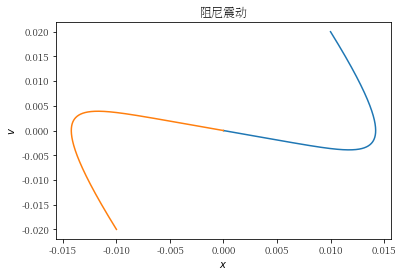

In [6]:
damped_oscillation(1.0, 3.0)

 A:  [[ 0.  1.]
 [ 1. -1.]] 
 lambda1: 0.61803398875 
 lambda2: -1.61803398875 
 c1: [ 0.85065081  0.52573111] 
 c2: [-0.52573111  0.85065081]


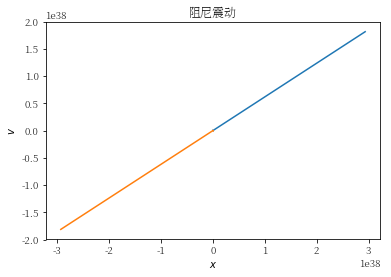

In [7]:
damped_oscillation(-1.0, 1.0)

## 不动点稳定性分析
### n维

非线性系统
$$ \dot{x_1}=f_1(x_1,x_2,\dots, x_n)$$
$$ \dot{x_2}=f_2(x_1,x_2,\dots, x_n)$$
$$ \cdots $$
$$ \dot{x_n}=f_n(x_1,x_2,\dots, x_n)$$

解方程
$$ f_1(x_1,x_2,\dots, x_n)=0 $$
$$ f_2(x_1,x_2,\dots, x_n)=0 $$
$$ \cdots $$
$$ f_n(x_1,x_2,\dots, x_n)=0 $$
得一个或多个不动点。设
$$ \bar{X}=(\bar{x_1},\bar{x_2}, \dots, \bar{x_n}) $$ 表示得到的不动点，下面分析其稳定性。

令$(x_1',x_2',\dots, x_n')$为小扰动，即$x_i'<<0$，
$$ \frac{d(\bar{x_1}+x_1')}{dt}=f_1(x_1,x_2,\dots, x_n)$$
$$ \frac{d(\bar{x_2}+x_1')}{dt}=f_2(x_1,x_2,\dots, x_n)$$
$$ \cdots $$
$$ \frac{d(\bar{x_n}+x_1')}{dt}=f_n(x_1,x_2,\dots, x_n)$$

注意到$ (\bar{x_1},\bar{x_2}, \dots, \bar{x_n}) $是不变的，利用$x_i'<<0$有

$$ \dot{x_1'}=\left(\frac{\partial f_1}{\partial x_1}\right)_\bar{X} x_1' + \left(\frac{\partial f_1}{\partial x_2}\right)_\bar{X} x_2' + \cdots + \left(\frac{\partial f_1}{\partial x_n}\right)_\bar{X} x_n'$$
$$ \dot{x_2'}=\left(\frac{\partial f_2}{\partial x_1}\right)_\bar{X} x_1' + \left(\frac{\partial f_2}{\partial x_2}\right)_\bar{X} x_2' + \cdots + \left(\frac{\partial f_2}{\partial x_n}\right)_\bar{X} x_n'$$
$$ \cdots $$
$$ \dot{x_n'}=\left(\frac{\partial f_n}{\partial x_1}\right)_\bar{X} x_1' + \left(\frac{\partial f_n}{\partial x_2}\right)_\bar{X} x_2' + \cdots + \left(\frac{\partial f_n}{\partial x_n}\right)_\bar{X} x_n'$$
简写为 $$\dot{X'} = A X'$$
利用$$ |A-\lambda I|=0$$求出其特征根。
如果有特征根大于0，则不动点是不稳定的。

### 2维
下面用2维具体计算一下。

$$\dot{x_1'} = a_{11} x_1' + a_{12}x_2'$$
$$\dot{x_2'} = a_{21} x_1' + a_{22}x_2'$$

设此方程的解为 $$x_1'= M e^{\lambda t},\;\;\; x_2'= N e^{\lambda t}$$

带入上面的方程得
$$ \lambda M = a_{11}M+a_{12}N$$
$$ \lambda N = a_{21}M+a_{22}N$$

也就是
$$ (a_{11}-\lambda)M+a_{12}N = 0 $$
$$ a_{21}M+(a_{22}-\lambda)N = 0 $$
特征根方程为
$$ \lambda^2 - T\lambda + \Delta = 0 $$
其中$$T = a_{11}+a_{22}$$ $$\Delta = a_{11}a_{22}-a_{12}a_{21}$$
特征根为
$$ \lambda_1 = \frac{1}{2}\left({T+\sqrt{T^2 - 4\Delta}}\right) $$
$$ \lambda_2 = \frac{1}{2}\left({T-\sqrt{T^2 - 4\Delta}}\right) $$

从$x_1'= M e^{\lambda t},\;\;\; x_2'= N e^{\lambda t}$知道，如果特征根都小于0时，小扰动会进一步减小，不动点是稳定的，否则是不稳定的。

### 例子

阻尼单摆。设$x_1$为角度，$x_2$为角速度，
$$\dot{x_1}=x_2$$
$$\dot{x_2}=-\frac{g}{l}\sin x_1 - r x_2 $$

解方程
$$x_2=0$$
$$-\frac{g}{l}\sin x_1 - r x_2 = 0$$
得两个平衡解（不动点）$$(0,0),\;\; (0,\pi)$$

对于第一个不动点$(0,0)$来说
$$\dot{x_1'} = x_2'$$
$$\dot{x_2'} = -\frac{g}{l} x_1' -r x_2'$$

$$T = -r$$ $$\Delta = \frac{g}{l}$$

$$ \lambda_1 = \frac{1}{2}\left({-r+\sqrt{r^2 - 4\frac{g}{l}}}\right) <0$$
$$ \lambda_2 = \frac{1}{2}\left({-r-\sqrt{r^2 - 4\frac{g}{l}}}\right) <0$$
这是一个稳定的不动点。

对于第二个不动点$(0,\pi)$来说
$$\dot{x_1'} = x_2'$$
$$\dot{x_2'} = \frac{g}{l} x_1' -r x_2'$$

$$T = -r$$ $$\Delta = -\frac{g}{l}$$

$$ \lambda_1 = \frac{1}{2}\left({-r+\sqrt{r^2 + 4\frac{g}{l}}}\right) >0$$
$$ \lambda_2 = \frac{1}{2}\left({-r-\sqrt{r^2 + 4\frac{g}{l}}}\right) <0$$
这是不稳定的不动点，是一个鞍点。

# 李雅普诺夫指数
Lyapunov exponents

$${\displaystyle |\delta \mathbf {Z} (t)|\approx e^{\lambda t}|\delta \mathbf {Z} _{0}|} $$

$$ \lambda =\lim _{t\to \infty }\lim _{\delta \mathbf {Z} _{0}\to 0}\frac {1}{t}\ln \frac {|\delta \mathbf {Z} (t)|}{|\delta \mathbf {Z} _{0}|}  $$

[0.11199723147468091, 0.11201909154908547, 0.11195003753796773, 0.11213206672276127, 0.11275078265808085]


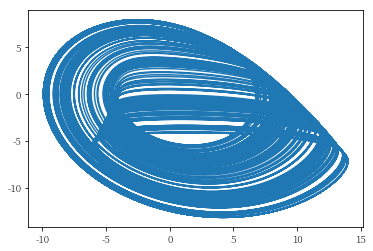

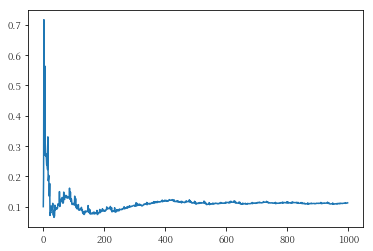

In [8]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def Lorenz(w,t,sigma,r,b):
    x,y,z=w
    return np.array([-sigma*(x-y), r*x-y-x*z, x*y-b*z])

def Lorenz_linear(tan_vec,t,x,y,z,sigma,r,b):
    u,v,w = tan_vec
    return np.array([ -sigma*(u-v), (r-z)*u-v-x*w, y*u+x*v-b*w ])

def Rossler(w,t,a,b,c,omega):
    x,y,z=w
    return np.array([-omega*y-z,omega*x+a*y,b+z*(x-c)])

def Rossler_linear(tan_vec,t,x,y,z,a,b,c,omega):
    u,v,w = tan_vec
    return np.array([ -omega*v-w, omega*u+a*v, z*u+(x-c)*w ])

if False:  # Lorenz
    #paras = (10.0, 28.0, 8.0/3.0) #(sigma, r, b)
    #paras = (16.0, 40.0, 4.0) #(sigma, r, b)
    paras = (16.0, 45.92, 4.0) #(sigma, r, b)
    func = Lorenz
    func_linear = Lorenz_linear
else:  # Rossler
    #paras = (0.2,0.2,2.5, 1.0) #(a,b,c,omega)  #极限环
    paras = (0.32,0.04,4.0, 1.0) #(a,b,c,omega) # 混沌
    func = Rossler
    func_linear = Rossler_linear


step = 0.01            # time difference
tau_nstep = 100        # size for tau
tau = step*tau_nstep   # tau
discard_time = 250.0    # discard data before this time so that we are on the attractor
#orbit_time = 200.0     # time for data orbit, beginning with zero
orbit_time = 1000.0

# discard data to get new initial condition on the attractor
discard_t_array  = np.arange(0.0,discard_time, step) 
discard_track = odeint(func,(5.0,0.0,0.0),discard_t_array,args=paras)
# get orbit
t     = np.arange(0.0, orbit_time, step)
track = odeint(func,discard_track[-1],t,args=paras)

# get normalized vector and the log(amplify factor) for the block [t,t+tau]
def tangent_amplify(linear_fun, constant_paras, init_vector, t_block, track_block):
    vec = init_vector.copy()
    for i in range(len(t_block)-1):
        vec = odeint(linear_fun, vec, (t_block[i], t_block[i+1]), tuple(track_block[i])+constant_paras)[1]
    ap = np.linalg.norm(vec)
    log_amplify = np.log(ap/np.linalg.norm(init_vector))
    vec = vec/ap
    return vec, log_amplify


U = np.array([1.0, 0.0, 0.0]) # initial condition for the tangent space
factors = []  # array for recording all log(amplify factor) later
for i in range(0,len(t)-tau_nstep,tau_nstep):
    U, fac = tangent_amplify(func_linear, paras, U, t[i:i+tau_nstep+1], track[i:i+tau_nstep+1])
    factors.append(fac)

# finally the largest Lyapunov exponent (LyaExp), changing with time (LyaExp_time)
LyaExp = [sum(factors[0:i+1])/tau/float(i+1) for i in range(len(factors))]
LyaExp_time = np.arange(len(LyaExp))*tau

print(LyaExp[-5:])

# to verify the convergences of the global properies
#flat_track = track.flatten()
#print("average: ", sum(flat_track)/len(flat_track))
#print("average 2: ", sum(flat_track**2)/len(flat_track))

plt.figure()
plt.plot(track[:,0], track[:,1])
plt.figure()
plt.plot(LyaExp_time, LyaExp)
plt.show()

# 庞加莱截面

<img src="Poincare_map.svg" width="65%"/>
图片来自：
https://en.wikipedia.org/wiki/Poincar%C3%A9_map

<img src="period_poincare_map.png" />
图片来自： Forced harmonic vibration of a Duffing osfile.pdf   Figure 5.11

<font size=6 color='purple'>     微分方程变迭代映射 </font>

## Rössler system
https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor

\begin{eqnarray*}
  \dot{x} & = & -y - z\\
  \dot{y} & = & x + a y\\
  \dot{z} & = & b+z(x-c)
\end{eqnarray*}

In [2]:
class rossler:
    def __init__(self):
        self.a = 0.2536  # parameters
        self.b = 0.022
        self.c = 4.0
        self.x0 = -5.0  #10.0  # space
        self.y0 = 0.0
        self.z0 = 0.0
        self.time_step = 0.02 #0.005   #数据的时间间隔
        self.time_begin = 000.0 
        self.time_end = 300.0
    def func(self, w, t): 
        x, y, z = w
        return np.array([(-1.0)*y-z, x+self.a*y, self.b+z*(x-self.c)]) 
    def generate(self):
        self.t = np.arange(self.time_begin, self.time_end, self.time_step) # 创建时间点 
        self.track = odeint(self.func, (self.x0, self.y0, self.z0), self.t) 

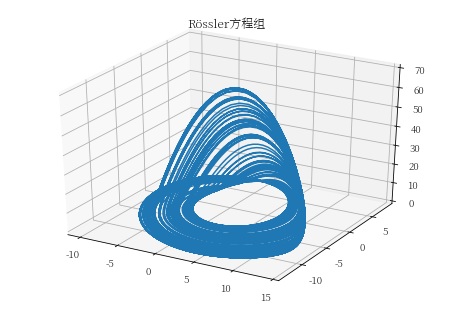

In [10]:
rsl = rossler()
rsl.a = 0.32
rsl.b = 0.04
rsl.c = 4.0
rsl.time_end = 500.0
rsl.generate()

fig=plt.figure()
ax=Axes3D(fig)
ax.plot(rsl.track[:,0],rsl.track[:,1],rsl.track[:,2])
#plt.plot(rsl.track[:,1], rsl.track[:,2])
plt.title("Rössler方程组")
plt.show()

截面为$x=0$的$y-z$平面。翘起部分。

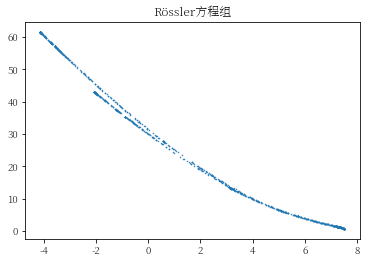

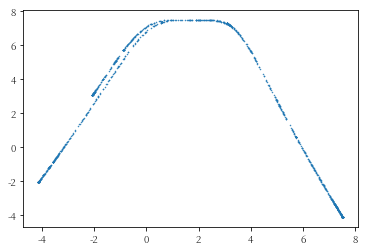

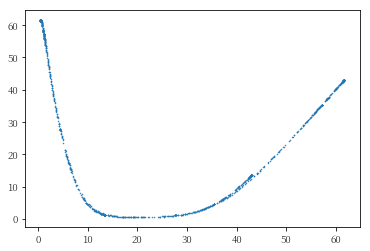

In [11]:
rsl = rossler()
rsl.a = 0.32
rsl.b = 0.04
rsl.c = 4.0
rsl.time_end = 5000.0
rsl.generate()

time_discard = 200.0

poicare_y = []
poicare_z = []
x_section = 0.0
for i in range(len(rsl.track)-1):
    if(rsl.t[i]>time_discard and rsl.track[i,0]>x_section and rsl.track[i+1,0]<=x_section):
        # 插值取点
        x1 = rsl.track[i,0]
        y1 = rsl.track[i,1]
        z1 = rsl.track[i,2]
        x2 = rsl.track[i+1,0]
        y2 = rsl.track[i+1,1]
        z2 = rsl.track[i+1,2]
        poicare_y.append(y1-x1*(y2-y1)/(x2-x1)) # 取插值
        poicare_z.append(z1-x1*(z2-z1)/(x2-x1)) # 取插值

plt.plot(poicare_y, poicare_z, '.', markersize=1)
plt.title("Rössler方程组")
plt.figure()
plt.plot(poicare_y[:-1], poicare_y[1:], '.', markersize=1)
plt.figure()
plt.plot(poicare_z[:-1], poicare_z[1:], '.', markersize=1)
plt.show()

截面为$x=0$的$y-z$平面。扁平部分。

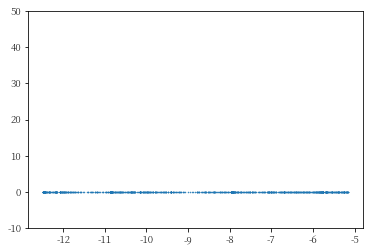

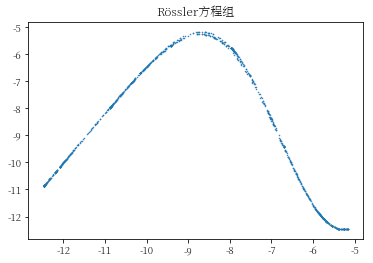

In [12]:
rsl = rossler()
rsl.a = 0.32
rsl.b = 0.04
rsl.c = 4.0
rsl.time_end = 5000.0
rsl.generate()

time_discard = 200.0

poicare_y = []
poicare_z = []
x_section = 0.0
for i in range(len(rsl.track)-1):
    if(rsl.t[i]>time_discard and rsl.track[i,0]<x_section and rsl.track[i+1,0]>=x_section):
        # 插值取点
        x1 = rsl.track[i,0]
        y1 = rsl.track[i,1]
        z1 = rsl.track[i,2]
        x2 = rsl.track[i+1,0]
        y2 = rsl.track[i+1,1]
        z2 = rsl.track[i+1,2]
        poicare_y.append(y1-x1*(y2-y1)/(x2-x1)) # 取插值
        poicare_z.append(z1-x1*(z2-z1)/(x2-x1)) # 取插值

plt.plot(poicare_y, poicare_z, '.', markersize=1)
plt.ylim([-10,50])
plt.figure()
plt.plot(poicare_y[:-1], poicare_y[1:], '.', markersize=1)
plt.title("Rössler方程组")
plt.show()

  
  <font size=10 color='brown'> 3维 -->  2维  -->  1维 </font>

## Forced Duffing oscillator
$\frac{d^2 x}{dt^2}+\delta \frac{dx}{dt}+\alpha x + \beta x^3= \gamma \cos(\omega t)$

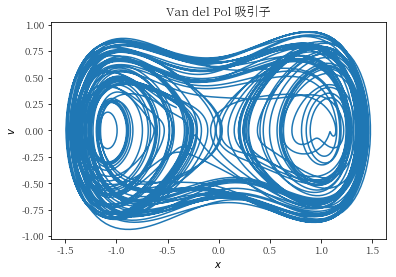

In [18]:
delta = 0.2
alpha = -1.0
beta  = 1.0
gamma = 0.3
omega = 1.0

def Duffing(w,t, delta, alpha, beta, gamma, omega):
    x,v=w
    return np.array([v, -delta*v - alpha*x-beta*x**3+ gamma*np.cos(omega*t)])

paras = (delta, alpha, beta, gamma, omega)

period_discard = 50
T_count = period_discard + 100 # 周期数
pts_per_T = 120  # 每个周期的点数
T = 2*np.pi/omega
t_all     = np.linspace(0.0,T*T_count, T_count*pts_per_T+1)

discard_t_array = t_all[:period_discard*pts_per_T]
discard_track = odeint(Duffing,(1.0,-0.1),discard_t_array,args=paras)
t = t_all[period_discard*pts_per_T:]
track = odeint(Duffing,discard_track[-1],t,args=paras)

plt.plot(track[:,0], track[:,1])

plt.title("Van del Pol 吸引子")
plt.xlabel("$x$")
plt.ylabel("$v$")

plt.show()

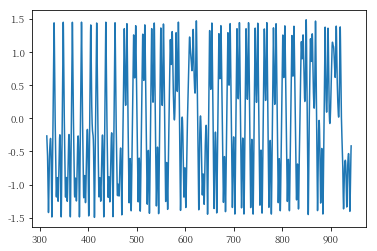

In [19]:
plt.plot(t, track[:,0])
plt.show()

In [20]:
period_discard = 50
T_count = period_discard + 4500 # 周期数
pts_per_T = 120  # 每个周期的点数
T = 2*np.pi/omega
t_all     = np.linspace(0.0,T*T_count, T_count*pts_per_T+1)

discard_t_array = t_all[:period_discard*pts_per_T]
discard_track = odeint(Duffing,(1.0,-0.1),discard_t_array,args=paras)
t = t_all[period_discard*pts_per_T:]
track = odeint(Duffing,discard_track[-1],t,args=paras)

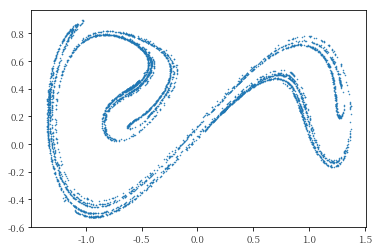

In [21]:
index = np.logical_or(abs(t/T % 1.0)<1e-5, abs((t/T % 1.0)-1)<1e-5)
#t[index]/T
section = track[index]
plt.plot(section[:,0], section[:,1],'.', markersize=1)
plt.show()

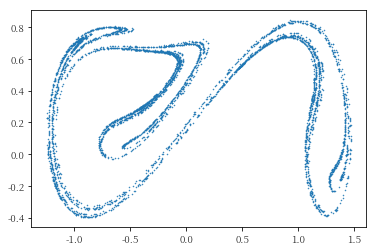

In [22]:
phi = 0.1
index = np.logical_or(abs((t-phi*T)/T % 1.0)<1e-5, abs(((t-phi*T)/T % 1.0)-1)<1e-5)
section = track[index]
plt.plot(section[:,0], section[:,1],'.', markersize=1)
plt.show()

动画，来自：
http://www.scholarpedia.org/article/Duffing_oscillator

<img src="Duffing_typical_anim.gif" />

# 分岔图

考察Rössler系统，取庞加莱截面为$x=0$的面，轨道打到此面上的坐标为$(y,z)$。把$y$的值取出来做观察，考察这些值随参数$c$怎么变化。

## Rössler系统，改变$c$的值

### c=4.5

In [21]:
def plot_rossler(c, discard_ratio=0.5):
    rsl = rossler()
    rsl.a = 0.2
    rsl.b = 0.2
    rsl.c = c
    rsl.time_end = 500.0
    rsl.generate()
    
    discard_count = int(len(rsl.track)*discard_ratio)

    fig=plt.figure()
    ax=Axes3D(fig)
    ax.plot(rsl.track[discard_count:,0],rsl.track[discard_count:,1],rsl.track[discard_count:,2])
    plt.title("Rössler方程组")
    plt.xlabel('x')
    plt.ylabel('y')

    plt.figure()
    plt.plot(rsl.track[:,1], rsl.track[:,2])
    plt.xlabel('y')
    plt.ylabel('z')
    plt.show()

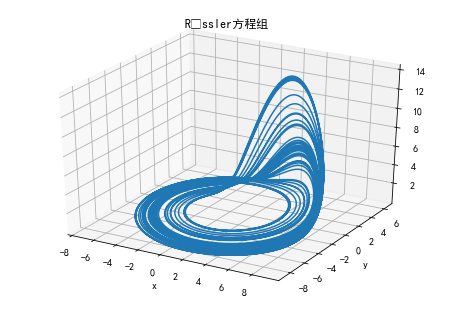

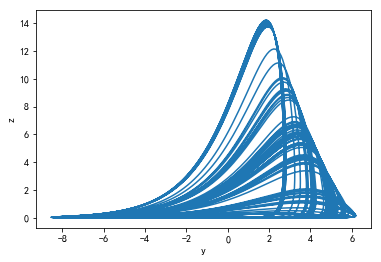

In [22]:
plot_rossler(4.5)

### c=4.0

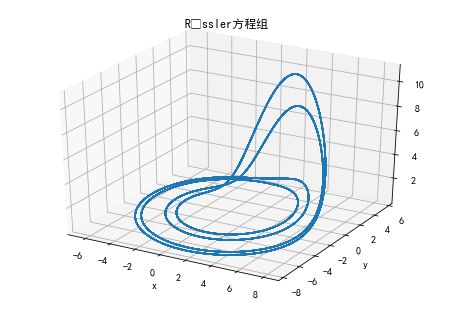

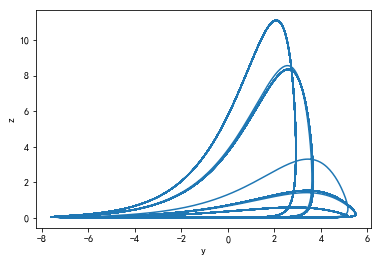

In [25]:
plot_rossler(4.0)

### c=3.5

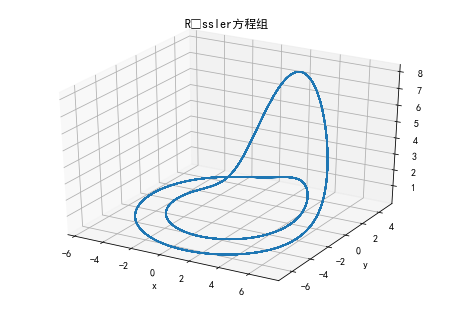

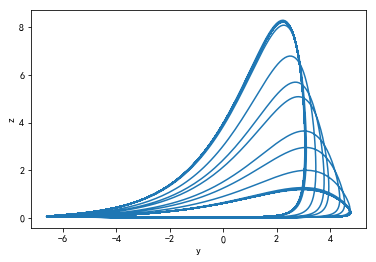

In [23]:
plot_rossler(3.5)

### c=2.5

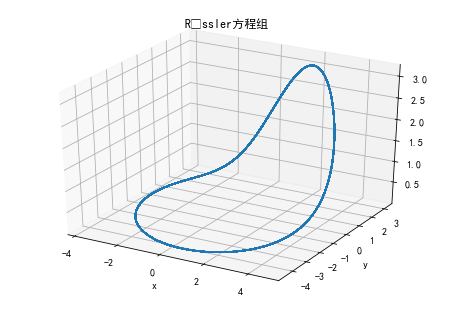

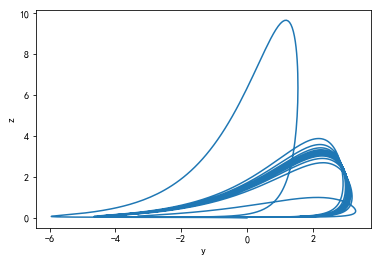

In [24]:
plot_rossler(2.5)

## 连续变化的分岔图
### c分成50份计算

在终端下执行 
python3 bifur_generate_Rossler.py 51 bifur_data_Rossler51.txt

或者notebook里执行：

import os

cwd = os.getcwd()

output = cwd+'/03/bifur_data_Rossler51.txt'

!python3 ./03/bifur_generate_Rossler.py 51 $output

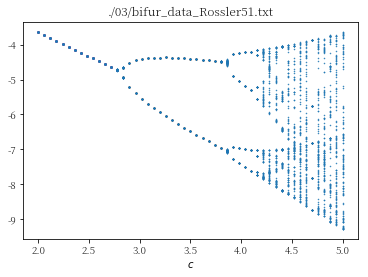

In [2]:
filename = './03/bifur_data_Rossler51.txt'
poicare = np.loadtxt(filename)
plt.plot(poicare[:,0], poicare[:,1], '.', markersize=1)
plt.title(filename)
plt.xlabel("$c$")
plt.show()

### c分成1000份计算
更精细的分岔图

在终端下执行 
python3 bifur_show.py bifur_data_Rossler1001bins.txt

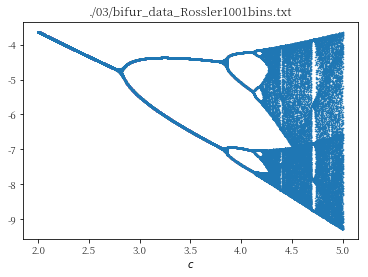

In [3]:
filename = './03/bifur_data_Rossler1001bins.txt'
poicare = np.loadtxt(filename)
plt.plot(poicare[:,0], poicare[:,1], '.', markersize=1)
plt.title(filename)
plt.xlabel("$c$")
plt.show()

# 倍周期分岔
相似性，规律性

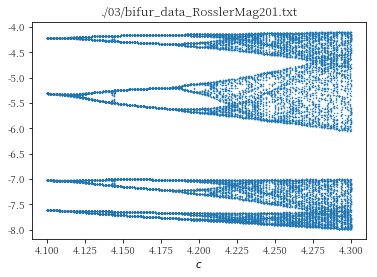

In [4]:
filename = './03/bifur_data_RosslerMag201.txt'
poicare = np.loadtxt(filename)
plt.plot(poicare[:,0], poicare[:,1], '.', markersize=1)
plt.title(filename)
plt.xlabel("$c$")
plt.show()

# The chaotic pendulum

http://farside.ph.utexas.edu/teaching/329/lectures/node46.html

$m l\frac{d^2 \theta}{dt^2}+\nu \frac{d\theta}{dt}+mg \sin \theta = A \cos(\omega t)$

化简为：

$\frac{d^2 \theta}{dt^2}+P \frac{d\theta}{dt}+ \sin \theta = A \cos(\omega t)$



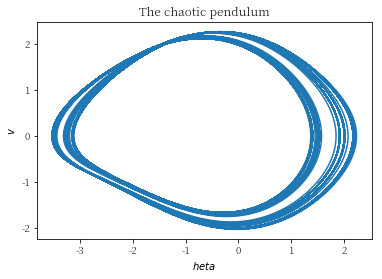

In [5]:
P  = 0.727
A = 1.5
omega = 2.0/3.0

def chaotic_pendulum(w,t, P,A,omega):
    theta,v=w
    return np.array([v, -P*v - np.sin(theta)+ A*np.cos(omega*t)])

paras = (P,A,omega)

period_discard = 400
T_count = period_discard + 400 # 周期数
pts_per_T = 800  # 每个周期的点数
T = 2*np.pi/omega
t_all     = np.linspace(0.0,T*T_count, T_count*pts_per_T+1)

discard_t_array = t_all[:period_discard*pts_per_T]
discard_track = odeint(chaotic_pendulum,(0.0,0.0),discard_t_array,args=paras)
t = t_all[period_discard*pts_per_T:]
track = odeint(chaotic_pendulum,discard_track[-1],t,args=paras)

plt.plot(track[:,0], track[:,1])

plt.title("The chaotic pendulum")
plt.xlabel("$\theta$")
plt.ylabel("$v$")

plt.show()

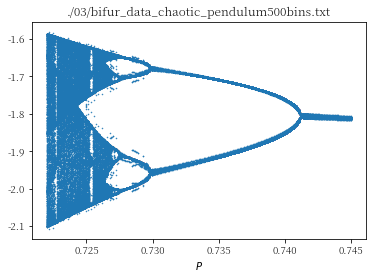

In [6]:
filename = './03/bifur_data_chaotic_pendulum500bins.txt'
poicare = np.loadtxt(filename)
plt.plot(poicare[:,0], poicare[:,1], '.', markersize=1)
plt.title(filename)
plt.xlabel("$P$")
plt.show()


<font size=6 color='purple'>     相同的分岔模式！共同的规律！ </font>



# 更多的分岔图

在终端下执行 
python3 bifur_show.py bifur_data_Duffing_1000bins.txt

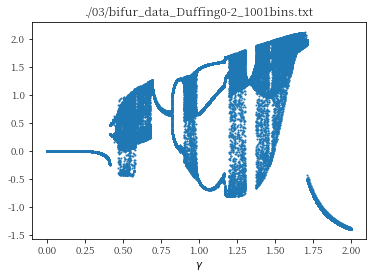

In [7]:
delta = 0.4
alpha = -1.0
beta  = 1.0
gamma = 2.0
omega = 0.5

filename = './03/bifur_data_Duffing0-2_1001bins.txt'
poicare = np.loadtxt(filename)
plt.plot(poicare[:,0], poicare[:,1], '.', markersize=2)
plt.title(filename)
plt.xlabel("$\gamma$")
plt.show()

# 轨道的功率谱

## Rossler周期轨道

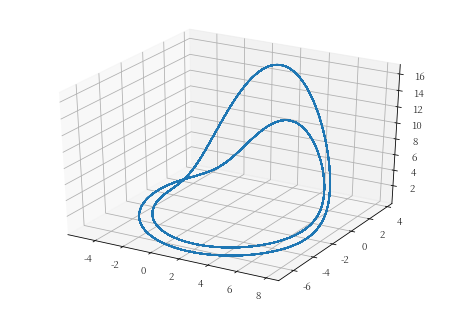

In [11]:
rsl = rossler()
rsl.a = 0.32
rsl.b = 0.04
rsl.c = 2.5
rsl.time_end = 500.0
rsl.generate()

discard = int(200./rsl.time_step)

fig=plt.figure()
ax=Axes3D(fig)
ax.plot(rsl.track[discard:,0],
        rsl.track[discard:,1],rsl.track[discard:,2])
plt.show()

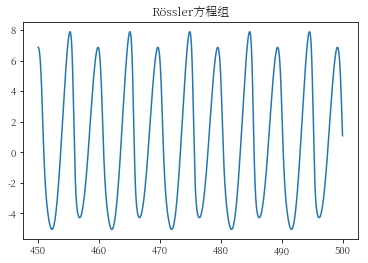

In [14]:
plt.plot(rsl.t[22500:], rsl.track[22500:,0])
plt.title("Rössler方程组")
plt.show()

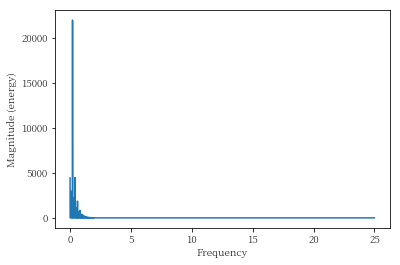

In [15]:
Fs = 1/rsl.time_step
plt.magnitude_spectrum(rsl.track[discard:,0], Fs=Fs)
plt.show()

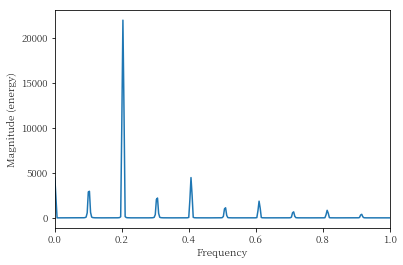

In [16]:
plt.magnitude_spectrum(rsl.track[discard:,0], Fs=Fs)
plt.xlim(0,1)
plt.show()

主频约0.2，周期为$\frac{1}{0.2}= 5$。上面的时间轨道图中数出10个峰, $\frac{500-450}{5}=10$

## Rossler混沌轨道

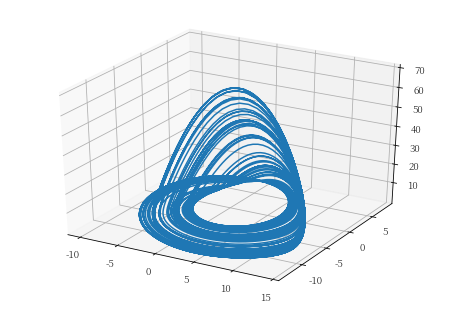

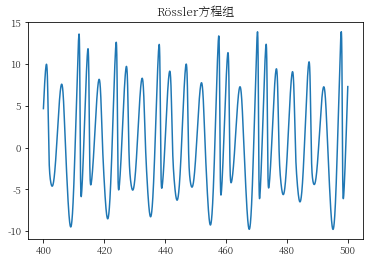

In [17]:
rsl = rossler()
rsl.a = 0.32
rsl.b = 0.04
rsl.c = 4.0
rsl.time_end = 500.0
rsl.generate()

discard = int(200./rsl.time_step)

fig=plt.figure()
ax=Axes3D(fig)
ax.plot(rsl.track[discard:,0],rsl.track[discard:,1],rsl.track[discard:,2])
plt.figure()
plt.plot(rsl.t[20000:], rsl.track[20000:,0])
plt.title("Rössler方程组")
plt.show()

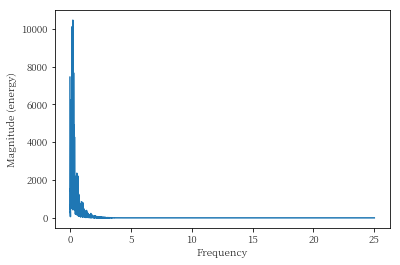

In [18]:
Fs = 1/rsl.time_step
plt.magnitude_spectrum(rsl.track[discard:,0], Fs=Fs)
plt.show()

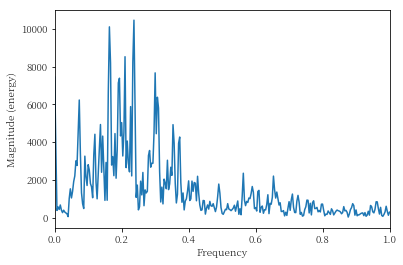

In [19]:
plt.magnitude_spectrum(rsl.track[discard:,0], Fs=Fs)
plt.xlim(0,1)
plt.show()

主频约为0.2，周期为$\frac{1}{0.2}= 5$。上面的时间轨道图中数出22个峰

In [20]:
1/0.2

5.0

In [21]:
100.0/22

4.545454545454546

# 练习

1. 画出Lorenz吸引子的庞加莱截面。
1. 画出Lorenz系统的分岔图，最好是倍周期分岔图。
1. 画出Rossler振子的李雅普诺夫随着参数变化的曲线图，其中参数的取法使用上面Rossler振子倍周期分岔图的取法。
1. 求出Lorenz系统某个混沌轨道的主频率。
1. Duffing振子发生共振了吗？系统的响应信号是怎样随着参数而变化的？

## 调研突变论
调研“突变论”，给出你对突变论的理解（400字）。突变论与非线性动力系统中的分岔图是什么关系？请说出你的观点。

##  布鲁塞尔振子
“Brusselator”布鲁塞尔振子描述了一种化学反应，它的方程是
$$\dot{u} = 1-(b+1)u+a u^2 v$$
$$\dot{v} = b u - a u^2, v$$
其中 $u\ge 0, \; v \ge 0$，$a,b$都是正的常数。求此系统的不动点，给出其稳定性分析。